In [1]:
import sys
import xgboost
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv('train_values.csv')

target= pd.read_csv('train_labels.csv')

data=data.drop(columns= ['patient_id'])

target=target.drop(columns='patient_id')

In [3]:

data['Presença_de_Doença']=target['heart_disease_present']


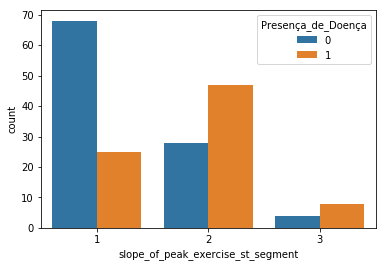

In [4]:
ax = sns.countplot(x="slope_of_peak_exercise_st_segment", hue="Presença_de_Doença", data=data)
##sns.boxplot(x = 'target', y = 'slope_of_peak_exercise_st_segment', data = data) 


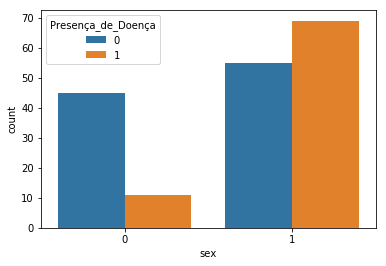

In [5]:
>>> ax = sns.countplot(x="sex", hue="Presença_de_Doença", data=data)

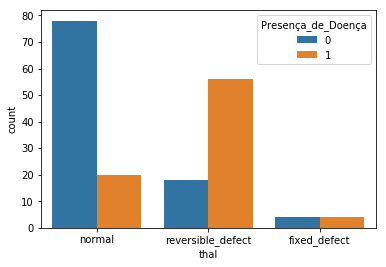

In [6]:
>>> ax = sns.countplot(x="thal", hue="Presença_de_Doença", data=data)

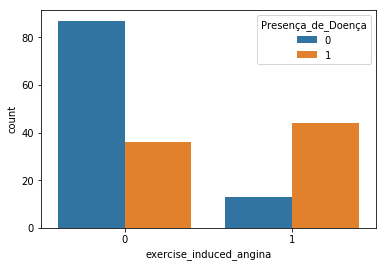

In [7]:
ax = sns.countplot(x="exercise_induced_angina", hue="Presença_de_Doença", data=data)

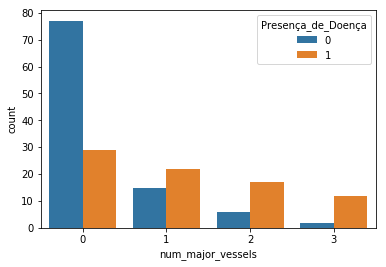

In [8]:
ax = sns.countplot(x="num_major_vessels", hue="Presença_de_Doença", data=data)

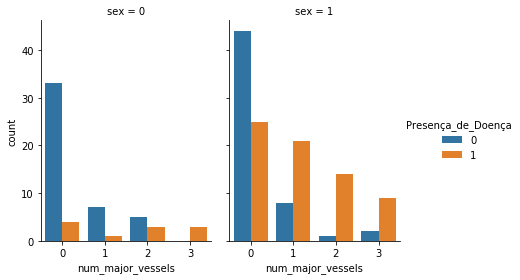

In [9]:
 g = sns.catplot(x="num_major_vessels", hue="Presença_de_Doença", col="sex",
                data=data, kind="count",
                height=4, aspect=.7);

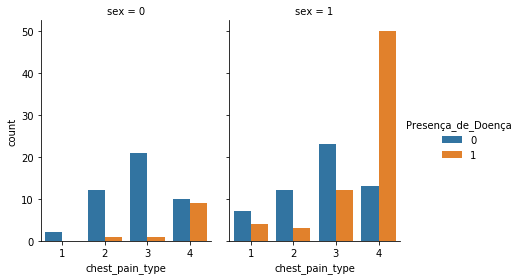

In [10]:
g = sns.catplot(x="chest_pain_type", hue="Presença_de_Doença", col="sex",
                data=data, kind="count",
                height=4, aspect=.7);

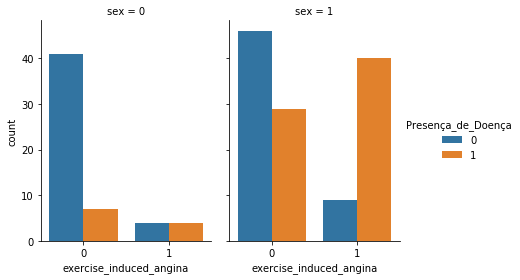

In [11]:
g = sns.catplot(x="exercise_induced_angina", hue="Presença_de_Doença", col="sex",
                data=data, kind="count",
                height=4, aspect=.7);

In [ ]:
g = sns.catplot(x="slope_of_peak_exercise_st_segment", hue="Presença_de_Doença", col="sex",
                data=data, kind="count",
                height=4, aspect=.7);

In [ ]:
g = sns.catplot(x="slope_of_peak_exercise_st_segment", hue="Presença_de_Doença", col="chest_pain_type",
                data=data, kind="count",
                height=4, aspect=.7);

In [ ]:
g = sns.catplot(x="slope_of_peak_exercise_st_segment", hue="Presença_de_Doença", col="num_major_vessels",
                data=data, kind="count",
                height=4, aspect=.7);

In [ ]:
encoder=OneHotEncoder(categories='auto',sparse=False)


x=data['sex'].values
x = x.reshape(len(x), 1)
x = encoder.fit_transform(x)
data["Male"] = x[:,0]
data["Female"] = x[:,1]

x=data['resting_ekg_results'].values
x = x.reshape(len(x), 1)
x = encoder.fit_transform(x)
data["tipo_0"] = x[:,0]
data["tipo_1"] = x[:,1]
data["tipo_2"] = x[:,2]

x=data['thal'].values
x = x.reshape(len(x), 1)
x = encoder.fit_transform(x)
data["thal_normal"] = x[:,0]
data["thal_reversible_defect"] = x[:,1]
data["thal_fixed_defect"] = x[:,2]

x=data['chest_pain_type'].values
x = x.reshape(len(x), 1)
x = encoder.fit_transform(x)
data["type_1"] = x[:,0]
data["type_2"] = x[:,1]
data["type_3"] = x[:,2]
data['type_4'] = x[:,3]


x=data['slope_of_peak_exercise_st_segment'].values
x = x.reshape(len(x), 1)
x = encoder.fit_transform(x)
data["slope_type_1"] = x[:,0]
data["slope_type_2"] = x[:,1]
data["slope_type_3"] = x[:,2]

data=data.drop(columns=['resting_ekg_results'])
data=data.drop(columns= ['sex'])
data=data.drop(columns= ['thal'])
data=data.drop(columns= ['chest_pain_type'])
data=data.drop(columns=['slope_of_peak_exercise_st_segment'])

data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 42)


scaler = MinMaxScaler()


features=['resting_blood_pressure','serum_cholesterol_mg_per_dl','age','max_heart_rate_achieved']

bases=[x_train,x_test]

def Scaler(features):
    for base in bases:
        for feature in features:
            t=base[feature].values
            t = t.reshape(len(t), 1)
            t=scaler.fit_transform(t)
            base[feature]=t[:,0]
        
        
        

Scaler(features)

In [ ]:

model = xgboost.XGBClassifier(random_state=42,penalty='l1',max_depth=2)

kfold = KFold(n_splits=3, random_state=42)

results = cross_val_score(model, x_train, y_train, cv=kfold)

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

y_pred
confusion_matrix(y_test,y_pred)

#from sklearn.metrics import accuracy_score
#accuracy=accuracy_score(y_pred,y_test)
#accuracy